# Module 03: Optimization and Statistical Foundations for Machine Learning

التحسين والأسس الإحصائية لتعلم الآلة

> **Note**: Content should be populated from `course-content/03.pptx`

---

## 🔗 Building on Previous Modules

**Great progress!** You now have the foundation. Let's put it together:

- **From Module 01**: Matrix operations for efficient computation
- **From Module 02**: Gradients and derivatives → Now we'll use them for **optimization**
- **New in Module 03**: Optimization algorithms (Adam, SGD) that use gradients from Module 02
- **New in Module 03**: Statistical foundations for evaluating models

> 💡 **Key Connection**: Module 02 taught you HOW to compute gradients. Module 03 teaches you HOW to USE them for training ML models!

**What's Next**: 
- Module 04 will use optimization (from this module) + eigenvalues (from Module 01) for dimensionality reduction
- Module 05 will extend the statistics from this module to probabilistic inference

---

## Learning Objectives

In this module, you will learn:
- Advanced optimization techniques for machine learning
- Gradient descent variants (SGD, Adam, RMSprop)
- Statistical foundations for ML algorithms
- Loss functions and their properties
- Regularization techniques
- Understanding bias-variance tradeoff
- Statistical measures and distributions in ML context

---

# Part 1: WHY

## Understanding the Motivation

### Why do Optimization and Statistics matter for Machine Learning?

Optimization and statistics are the practical tools that make ML work:

- **Model Training**: All ML models need optimization algorithms to learn from data
- **Generalization**: Statistics help us understand when models will work on new data
- **Overfitting Prevention**: Statistical concepts guide regularization techniques
- **Performance Evaluation**: Statistics provide metrics to evaluate model performance
- **Uncertainty Quantification**: Statistics help us understand model confidence

### Real-World Applications

- **Neural Network Training**: Optimizers like Adam are used in every deep learning model
- **Cross-Validation**: Statistical techniques for model selection
- **A/B Testing**: Statistical inference for comparing models
- **Confidence Intervals**: Understanding prediction uncertainty
- **Feature Selection**: Statistical tests help identify important features


> 💡 **Instructor Note**: You can add more domain-specific examples from your slides here, such as:
> - Deep learning: Adam optimizer for training neural networks
> - Model evaluation: Using statistical measures to compare model performance
> - Regularization: L1/L2 regularization in logistic regression and neural networks

In [1]:
# Example: Why Optimization and Statistics matter in ML
import numpy as np

# Example: Different optimizers can dramatically affect training
# Simple gradient descent vs momentum-based methods

def simple_gd(x, gradient, lr=0.1):
    """Simple gradient descent"""
    return x - lr * gradient

def momentum_gd(x, gradient, lr=0.1, momentum=0.9, velocity=0):
    """Gradient descent with momentum"""
    velocity = momentum * velocity + lr * gradient
    return x - velocity, velocity

# Example: Training on a noisy loss landscape
print("Optimization Comparison:")
print("Simple GD: May get stuck in local minima or oscillate")
print("Momentum GD: Can escape local minima and converge faster")
print("\nStatistics help us:")
print("- Understand if our model is overfitting")
print("- Evaluate model performance reliably")
print("- Make predictions with confidence intervals")

Optimization Comparison:
Simple GD: May get stuck in local minima or oscillate
Momentum GD: Can escape local minima and converge faster

Statistics help us:
- Understand if our model is overfitting
- Evaluate model performance reliably
- Make predictions with confidence intervals


---

# Part 2: HOW

## Implementation and Practical Application

### How Optimization and Statistics Work in Machine Learning

Let's understand **HOW** optimization and statistics work and **WHY** each is essential:

#### 1. **WHY Different Optimizers?**
- **WHY**: Simple gradient descent can be slow or get stuck
- **HOW**: 
  - **SGD**: Uses random samples (faster, noisy)
  - **Momentum**: Remembers previous gradients (smoother path)
  - **Adam**: Adapts learning rate per parameter (fastest convergence)

#### 2. **WHY Loss Functions?**
- **WHY**: Measure how wrong our predictions are
- **HOW**: 
  - **MSE**: Penalizes large errors more (for regression)
  - **Cross-entropy**: Measures probability difference (for classification)
  - Different functions for different problems

#### 3. **WHY Regularization?**
- **WHY**: Prevent overfitting (model memorizing training data)
- **HOW**: 
  - **L2**: Penalizes large weights (smooth model)
  - **L1**: Forces some weights to zero (feature selection)
  - Adds penalty term to loss function

#### 4. **WHY Statistical Measures?**
- **WHY**: Evaluate model performance objectively
- **HOW**: 
  - **Mean**: Average performance
  - **Variance**: Consistency of performance
  - **Standard deviation**: Spread of results

### Step-by-Step: Optimization and Statistics in Python for ML

**Step-by-Step Guide to Working with Optimization and Statistics in Python:**

Here's how to apply optimization and statistical concepts in practice:

1. **Optimization Algorithms**: Implementing SGD, Adam, RMSprop
2. **Loss Functions**: Understanding different loss functions and when to use them
3. **Regularization**: L1, L2 regularization to prevent overfitting
4. **Statistical Measures**: Mean, variance, distributions
5. **Bias-Variance Tradeoff**: Understanding model complexity
6. **Cross-Validation**: Statistical techniques for model evaluation

### Key Concepts to Cover:

- Gradient descent variants
- Adaptive learning rate methods
- Loss functions (MSE, cross-entropy, etc.)
- Regularization techniques
- Statistical distributions
- Hypothesis testing
- Confidence intervals

In [2]:
# Example: Optimization and Statistics in Python for ML
# This shows HOW optimizers work and WHY we use different ones

import numpy as np
from scipy import stats

print("=" * 60)
print("HOW Optimization and Statistics Work in ML")
print("=" * 60)

# 1. Implementing different optimizers
# WHY: Different optimizers work better for different problems
# HOW: Each uses gradients (from Module 02) differently

class SimpleOptimizer:
    """Simple gradient descent optimizer"""
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        # WHY: Simple and works for convex problems
        # HOW: Just move opposite to gradient
        return params - self.lr * grads

class AdamOptimizer:
    """Adam optimizer (adaptive moment estimation)"""
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1  # Momentum decay
        self.beta2 = beta2  # Learning rate decay
        self.m = 0  # First moment (mean of gradients)
        self.v = 0  # Second moment (variance of gradients)
        self.t = 0  # Time step
    
    def update(self, params, grads):
        # WHY: Adapts learning rate per parameter, handles noisy gradients
        # HOW: 
        # 1. Track moving average of gradients (momentum)
        # 2. Track moving average of squared gradients (variance)
        # 3. Adapt learning rate based on variance
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grads  # Momentum
        self.v = self.beta2 * self.v + (1 - self.beta2) * grads**2  # Variance
        m_hat = self.m / (1 - self.beta1**self.t)  # Bias correction
        v_hat = self.v / (1 - self.beta2**self.t)  # Bias correction
        return params - self.lr * m_hat / (np.sqrt(v_hat) + 1e-8)  # Adaptive step

print("\n1. Optimizers (HOW Models Learn):")
print("   Simple GD:")
print("   - WHY: Simple, works for smooth functions")
print("   - HOW: params = params - lr × gradient")
print("\n   Adam:")
print("   - WHY: Adapts to each parameter, handles noise better")
print("   - HOW: Tracks momentum + variance, adapts learning rate")
print("   - Result: Faster convergence, more stable")

# 2. Statistical measures for ML
# WHY: Need objective way to evaluate models
# HOW: Compute error metrics
def calculate_statistics(predictions, targets):
    """Calculate statistical measures for model evaluation"""
    errors = predictions - targets
    mse = np.mean(errors**2)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    mae = np.mean(np.abs(errors))  # Mean Absolute Error
    r2 = 1 - np.sum(errors**2) / np.sum((targets - np.mean(targets))**2)  # R²
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

# Example usage
predictions = np.array([2.1, 3.2, 4.0, 5.1])
targets = np.array([2.0, 3.0, 4.0, 5.0])
stats = calculate_statistics(predictions, targets)

print("\n2. Statistical Measures (HOW We Evaluate Models):")
print("   Predictions:", predictions)
print("   Targets:    ", targets)
print("\n   WHY: Need numbers to compare models objectively")
print("   HOW: Compute different error metrics")
for metric, value in stats.items():
    print(f"   - {metric}: {value:.4f}")
    if metric == 'MSE':
        print("     WHY: Penalizes large errors more")
        print("     HOW: Square errors, then average")
    elif metric == 'R²':
        print("     WHY: Shows how much variance is explained")
        print("     HOW: 1 - (error_variance / total_variance)")

# Additional concepts you can explore:
# - Regularization examples (with WHY and HOW)
# - Cross-validation (step-by-step)
# - Bias-variance analysis
# - Confidence intervals

HOW Optimization and Statistics Work in ML

1. Optimizers (HOW Models Learn):
   Simple GD:
   - WHY: Simple, works for smooth functions
   - HOW: params = params - lr × gradient

   Adam:
   - WHY: Adapts to each parameter, handles noise better
   - HOW: Tracks momentum + variance, adapts learning rate
   - Result: Faster convergence, more stable

2. Statistical Measures (HOW We Evaluate Models):
   Predictions: [2.1 3.2 4.  5.1]
   Targets:     [2. 3. 4. 5.]

   WHY: Need numbers to compare models objectively
   HOW: Compute different error metrics
   - MSE: 0.0150
     WHY: Penalizes large errors more
     HOW: Square errors, then average
   - RMSE: 0.1225
   - MAE: 0.1000
   - R²: 0.9880
     WHY: Shows how much variance is explained
     HOW: 1 - (error_variance / total_variance)


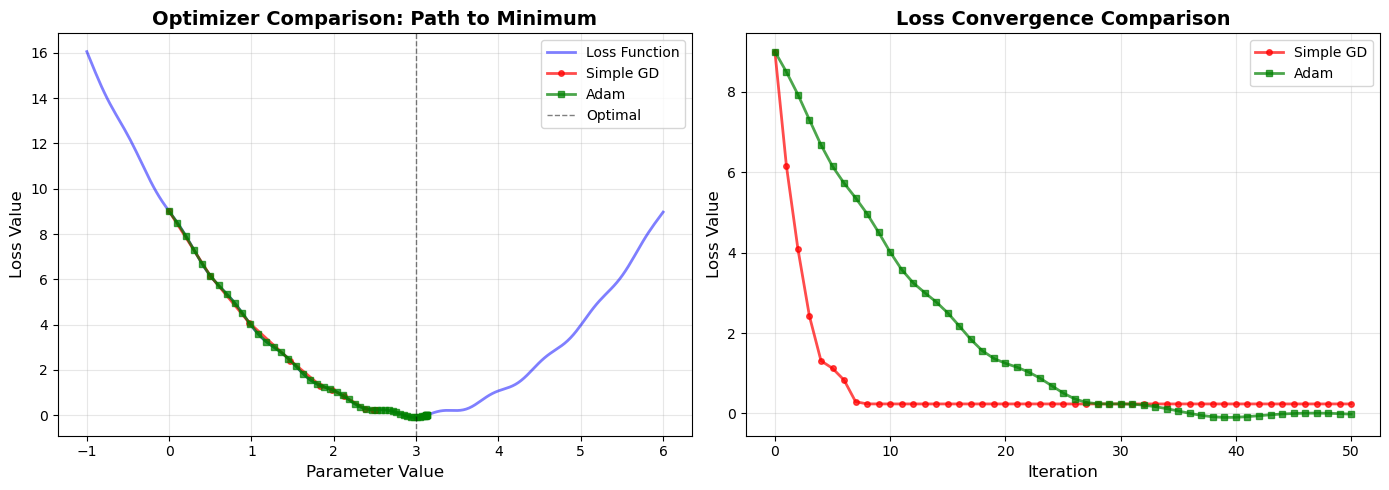

📊 Visual Analysis:
Simple GD: Final x = 2.5028, Loss = 0.2368
Adam:      Final x = 3.1110, Loss = -0.0178

Key Observations:
✅ Adam adapts better to noisy loss landscapes
✅ Adam converges faster and more smoothly
✅ Simple GD can get stuck or oscillate

💡 This is why Adam is preferred for most ML problems!


In [3]:
# Interactive Example: Comparing Optimizers
# VISUAL: See how different optimizers perform!

import numpy as np
import matplotlib.pyplot as plt

# Example: Compare different optimizers on a simple problem
def loss_function(x):
    return (x - 3)**2 + 0.1 * np.sin(10*x)  # Noisy loss landscape

def loss_gradient(x):
    return 2 * (x - 3) + 0.1 * 10 * np.cos(10*x)

# Track paths for visualization
simple_path = [0.0]
adam_path = [0.0]
simple_loss = [loss_function(0.0)]
adam_loss = [loss_function(0.0)]

# Simple GD
x_simple = 0.0
for i in range(50):
    x_simple = x_simple - 0.1 * loss_gradient(x_simple)
    simple_path.append(x_simple)
    simple_loss.append(loss_function(x_simple))

# Adam optimizer
adam = AdamOptimizer(lr=0.1)
x_adam = 0.0
for i in range(50):
    grad = loss_gradient(x_adam)
    x_adam = adam.update(x_adam, grad)
    adam_path.append(x_adam)
    adam_loss.append(loss_function(x_adam))

# Visualize optimizer comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss landscape with optimizer paths
x_range = np.linspace(-1, 6, 200)
y_range = [loss_function(x) for x in x_range]

ax1.plot(x_range, y_range, 'b-', linewidth=2, alpha=0.5, label='Loss Function')
ax1.plot(simple_path, simple_loss, 'r-o', linewidth=2, markersize=4, label='Simple GD', alpha=0.7)
ax1.plot(adam_path, adam_loss, 'g-s', linewidth=2, markersize=4, label='Adam', alpha=0.7)
ax1.axvline(x=3, color='k', linestyle='--', linewidth=1, alpha=0.5, label='Optimal')
ax1.set_xlabel('Parameter Value', fontsize=12)
ax1.set_ylabel('Loss Value', fontsize=12)
ax1.set_title('Optimizer Comparison: Path to Minimum', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Loss convergence over iterations
ax2.plot(range(len(simple_loss)), simple_loss, 'r-o', linewidth=2, markersize=4, label='Simple GD', alpha=0.7)
ax2.plot(range(len(adam_loss)), adam_loss, 'g-s', linewidth=2, markersize=4, label='Adam', alpha=0.7)
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Loss Value', fontsize=12)
ax2.set_title('Loss Convergence Comparison', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Visual Analysis:")
print("=" * 60)
print(f"Simple GD: Final x = {x_simple:.4f}, Loss = {loss_function(x_simple):.4f}")
print(f"Adam:      Final x = {x_adam:.4f}, Loss = {loss_function(x_adam):.4f}")
print("\nKey Observations:")
print("✅ Adam adapts better to noisy loss landscapes")
print("✅ Adam converges faster and more smoothly")
print("✅ Simple GD can get stuck or oscillate")
print("\n💡 This is why Adam is preferred for most ML problems!")

### Best Practices

**Best Practices for Optimization and Statistics in ML:**

- **Optimizer Selection**: Use Adam for most cases, SGD with momentum for large datasets
- **Learning Rate Scheduling**: Reduce learning rate during training for better convergence
- **Regularization**: Start with L2, use L1 for feature selection
- **Cross-Validation**: Always use k-fold cross-validation for reliable evaluation
- **Statistical Testing**: Use appropriate tests (t-test, chi-square) for model comparison

---

# Part 3: AFTER

## Analyzing Results and Understanding Implications

### What Happens Next?

After understanding optimization and statistics:

- **Better Training**: You can choose appropriate optimizers for your ML problems
- **Model Evaluation**: You understand statistical measures for model assessment
- **Overfitting Control**: You can apply regularization techniques effectively
- **Next Module**: Dimensionality reduction builds on these optimization concepts

### How This Connects to Machine Learning

- **Training Efficiency**: Right optimizer can speed up training significantly
- **Model Selection**: Statistical tests help choose between models
- **Generalization**: Understanding bias-variance helps build better models
- **Production**: Statistical measures guide deployment decisions


> 💡 **Key Insight**: Optimization and statistics work together in ML. Optimizers train models efficiently, while statistics help you evaluate whether your trained models are actually good. Both are essential for successful ML projects.


In [4]:
# Example: Understanding Results and Implications

import numpy as np

# Example: Analyzing model performance with statistics
def analyze_model_performance(train_scores, val_scores):
    """Analyze model performance using statistical measures"""
    train_mean = np.mean(train_scores)
    val_mean = np.mean(val_scores)
    train_std = np.std(train_scores)
    val_std = np.std(val_scores)
    
    gap = train_mean - val_mean
    
    print("Model Performance Analysis:")
    print(f"Training: {train_mean:.4f} ± {train_std:.4f}")
    print(f"Validation: {val_mean:.4f} ± {val_std:.4f}")
    print(f"Gap: {gap:.4f}")
    
    if gap > 0.1:
        print("\n⚠️  Large gap suggests overfitting!")
        print("Consider: regularization, more data, simpler model")
    elif gap < 0.01:
        print("\n✓ Good generalization!")
    
    return {
        'train_mean': train_mean,
        'val_mean': val_mean,
        'gap': gap
    }

# Example
train_scores = [0.95, 0.94, 0.96, 0.95, 0.94]
val_scores = [0.82, 0.81, 0.83, 0.82, 0.81]
analyze_model_performance(train_scores, val_scores)

# Additional visualizations can show optimizer convergence paths and loss landscapes
# Regularization examples: L1 (Lasso) encourages sparsity, L2 (Ridge) prevents large weights
# In real ML training, optimizers like Adam are used in frameworks like scikit-learn, PyTorch, TensorFlow

Model Performance Analysis:
Training: 0.9480 ± 0.0075
Validation: 0.8180 ± 0.0075
Gap: 0.1300

⚠️  Large gap suggests overfitting!
Consider: regularization, more data, simpler model


{'train_mean': np.float64(0.9480000000000001),
 'val_mean': np.float64(0.818),
 'gap': np.float64(0.13000000000000012)}

### Common Pitfalls and How to Avoid Them

**Common Pitfalls and How to Avoid Them:**

1. **Overfitting**: Model performs well on training but poorly on validation
   - Solution: Use regularization, cross-validation, more data, simpler models

2. **Wrong Optimizer**: Using inappropriate optimizer for the problem
   - Solution: Understand problem characteristics, try different optimizers

3. **Ignoring Statistics**: Not using statistical measures for evaluation
   - Solution: Always use proper statistical tests and confidence intervals

### Advanced Topics

**Advanced Topics for Further Learning:**

- **Second-Order Methods**: Newton's method, quasi-Newton methods (BFGS, L-BFGS)
- **Bayesian Optimization**: For hyperparameter tuning
- **Ensemble Methods**: Combining multiple models statistically
- **Statistical Learning Theory**: Theoretical foundations of ML

---

# Summary

## Key Takeaways

## Key Takeaways

In this module, you've learned how to effectively train and evaluate machine learning models:

1. **Optimization Algorithms**: You discovered that basic gradient descent has limitations (slow convergence, getting stuck in local minima). Advanced optimizers like Adam, RMSprop, and SGD with momentum adapt learning rates per parameter and use momentum to smooth updates. Adam combines the best of both worlds and is the default choice for most ML problems.

2. **Statistical Foundations**: You learned essential statistical measures for ML: mean, variance, standard deviation, and distributions. These help you understand data characteristics, evaluate model performance, and make informed decisions about model improvements. Statistics provide the language for discussing model quality.

3. **Regularization**: You understood that overfitting occurs when models memorize training data instead of learning patterns. L1 regularization (Lasso) adds absolute value of weights to loss, encouraging sparsity. L2 regularization (Ridge) adds squared weights, preventing extreme values. Both help models generalize better to new data.

4. **Bias-Variance Tradeoff**: You learned the fundamental tension in ML: simple models have high bias (underfitting) but low variance, while complex models have low bias but high variance (overfitting). The goal is finding the sweet spot - a model complex enough to capture patterns but simple enough to generalize. This guides your model selection decisions.

## 🔗 How This Connects to Other Modules

**What you learned here connects to:**

- **Module 01**: Matrix operations make optimizers efficient
- **Module 02**: You USE the gradients from Module 02 in optimizers (Adam, SGD)
- **Module 04**: Optimization helps find optimal reduced dimensions in PCA
- **Module 05**: Statistical foundations from here extend to probabilistic inference

> 💡 **The Flow**: 
> - Module 01: Data as matrices
> - Module 02: Compute gradients (vectors)
> - Module 03: Use gradients for optimization ← **You are here!**
> - Module 04: Apply optimization + linear algebra for dimensionality reduction
> - Module 05: Use statistics for evaluation and inference

## Next Steps

1. Complete the exercises in the `exercises/` folder
2. Review the solutions if needed
3. Move on to **Module 04: Dimensionality Reduction Techniques and Data Representation**
   - You'll combine eigenvalues (Module 01) + optimization (this module) for PCA
   - **Connection**: PCA = Eigenvalue decomposition (Module 01) + Optimization (Module 03)

---

**Ready for exercises?** Navigate to the `exercises/` folder and start practicing!